# Workshop 1
- Dax Navarrete

### Env preparation 
UV external manager venv is being used, not pip 

In [5]:
!uv add seaborn

Resolved 47 packages in 1ms
Audited 41 packages in 0.43ms


In [2]:
# imports
from typing import List, Dict
import seaborn as sns
import matplotlib.pyplot as plt
from random import randint


## First Algorithm

Calculate the number of iterations required in the $1 + 1/2 + 1/4 + 1/8 + 1/16 $ serie for it to have a $10^-1$ error 

In [3]:
def sum_convergence_with_error(max_error: float) -> None:
    """Sum convergence until a given error

    Args:
        max_error (float): tolerated error
    """

    sum: float = 1
    counter: int = 1  # 1 thinking that the 1 counts as an add
    divider: int = 2
    while (True):

        sum = sum + 1/divider

        divider *= 2
        print(sum)
        counter += 1
        if ((2-sum) <= max_error):
            print(counter)
            break


In [4]:
sum_convergence_with_error(10**-1)

1.5
1.75
1.875
1.9375
5


## Second algorithm 
Bubble sort implementation

In [5]:
def bubble_sort(vector: List[float]) -> List[float]:
    """Sort a vector of numbers

    Args:
        vector (List[float]): Vector to be sorted

    Returns:
        List[float]: Sorted Vector
    """
    counter: int = 0
    for i in range(0, len(vector)):
        swapped: bool = False
        for j in range(1, len(vector)-i):
            if (vector[j] < vector[j - 1]):
                vector[j], vector[j - 1] = vector[j - 1], vector[j]
                counter += 1
                swapped = True
        if (not swapped):
            break
    print(f"{counter} swaps were done ")
    return vector


Worst time complexity when the array is completely disordered $O(n^2)$ and the best when is ordered $(1)$

In [6]:
worst_case: List[float] = [5, 4, 3, 2, 1]
best_case: List[float] = [1, 2, 3, 4, 5] 

Array with random numbers between -200 and 145

In [7]:
vector2: List[float] = [float(randint(-200, 145))
                            for i in range(0, 100000)]

In [8]:
print("in the worst case: ", bubble_sort(worst_case))
print("in the best case: ", bubble_sort(best_case))
# print(bubble_sort(vector2))

10 swaps were done 
in the worst case:  [1, 2, 3, 4, 5]
0 swaps were done 
in the best case:  [1, 2, 3, 4, 5]


## Third Algorithm
Fibonacci implemntation and ploting 

In [9]:
def fibonacci(n: int) -> int:
    """Fibonacci sequence

    Args:
        n (int): non negative integer

    Returns:
        int: fibonacci value at n iterations
    """
    if (n == 0):
        return 0
    else:
        x: int = 0
        y: int = 1
        for i in range(1, n):
            z: int = x + y
            x = y
            y = z
    return y


A "dataset" will be filled with the fibonacci value in each iteration with a n given number of iterations

In [10]:
def fill_with_fibonacci_data(iterations: int) -> Dict[str, List[float]]:
    """Fill a dictionary with fibonacci values

    Args:
        iterations (int): number of iterations for fibonacci values

    Returns:
        Dict[str, List[float]]: dictionary with x and y values for plotting
    """
    x_values: List[float] = [float(i) for i in range(0, iterations)]
    values: Dict[str, List[float]] = {"x": x_values}
    values["y"] = [fibonacci(int(i)) for i in x_values]
    return values


Plots will be done with using **Seaborn** library using the filled dataset

In [ ]:
def plot_fibonacci_values(iterations: int) -> None:
    """Plots fibonacci values with n iterations

    Args:
        iterations (int): number of iterations
    """
    fibonacci_data: Dict[str, List[float]
                         ] = fill_with_fibonacci_data(iterations)

    sns.set_theme()
    sns.lineplot(x=fibonacci_data["x"], y=fibonacci_data["y"], marker="X")
    plt.title("Fibonacci Values")
    plt.xlabel("n value")
    plt.ylabel("Fibonacci value")
    plt.show()


def plot_fibonacci_div(iterations: int) -> None:
    """Plots fibonacci values division with the previous value in n iterations

    Args:
        iterations (int): number of iterations
    """

    fibonacci_data: Dict[str, List[float]
                         ] = fill_with_fibonacci_data(iterations)
    x_vals: list[float] = fibonacci_data["x"][2:]
    y_vals: list[float] = [fibonacci_data["y"][i]/fibonacci_data["y"][i-1] 
              for i in range(2, len(fibonacci_data["y"]))]

    sns.lineplot(x=x_vals, y=y_vals, marker="x", linestyle="--")
    phi = (1 + 5**0.5) / 2
    
    for x, y in zip(x_vals, y_vals):
        plt.text(x, y, f"{y:.2f}", ha="center", va="bottom", fontsize=9)
        
        
    plt.text(x_vals[-1], phi + 0.1, r"$\varphi \approx 1.618$", 
             color="blue", fontsize=10, ha="right")
    
    plt.title("Fibonacci Convergence")
    plt.xlabel("n value")
    plt.ylabel("Fibonacci value / fib value -1")
    plt.show()

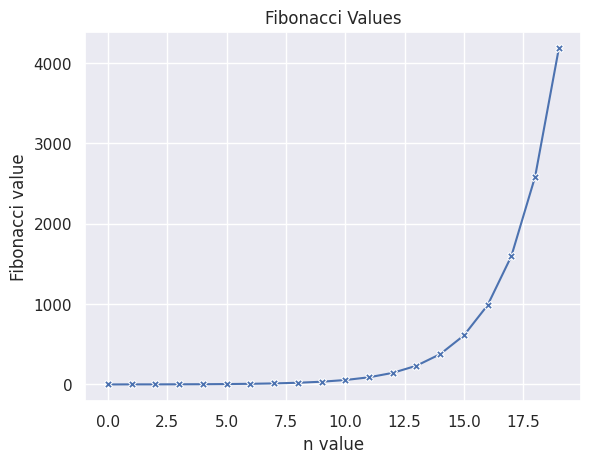

In [12]:
plot_fibonacci_values(20)

### Fibonaci convergence

The division of the value of a value of fibonacci and the previus one will converge in an amazing and perfect number which is $\Phi$ and its value is $\approx 1.61803$

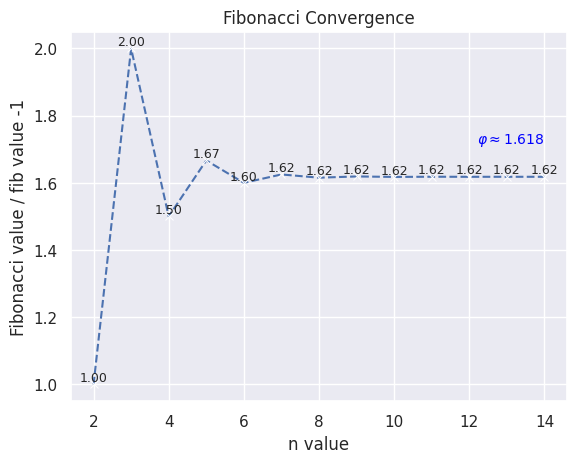

In [13]:
plot_fibonacci_div(15)

### Fibonacci relative error 

$ \frac{Y_{i + 1}} {Y_i} (i > 0) $


when $\frac{1 + \sqrt{5}}{2}$
is inside $10^{-5}$

In [14]:
from decimal import Decimal, ROUND_HALF_UP

def round_half_up(n, decimals=0):
    multiplier = 10 ** decimals
    return float(Decimal(n).quantize(Decimal("1") / multiplier, rounding=ROUND_HALF_UP))

In [16]:
round_half_up(2.675, 2)

2.67

In [21]:
counter: int = 0


fibonacci_data: Dict[str, List[float]
                         ] = fill_with_fibonacci_data(100)
y_vals = [fibonacci_data["y"][i]/fibonacci_data["y"][i-1]
              for i in range(2, len(fibonacci_data["y"]))]

In [22]:
y_vals

[1.0,
 2.0,
 1.5,
 1.6666666666666667,
 1.6,
 1.625,
 1.6153846153846154,
 1.619047619047619,
 1.6176470588235294,
 1.6181818181818182,
 1.6179775280898876,
 1.6180555555555556,
 1.6180257510729614,
 1.6180371352785146,
 1.618032786885246,
 1.618034447821682,
 1.6180338134001253,
 1.618034055727554,
 1.6180339631667064,
 1.6180339985218033,
 1.618033985017358,
 1.6180339901755971,
 1.618033988205325,
 1.618033988957902,
 1.6180339886704431,
 1.6180339887802426,
 1.618033988738303,
 1.6180339887543225,
 1.6180339887482036,
 1.6180339887505408,
 1.6180339887496482,
 1.618033988749989,
 1.618033988749859,
 1.6180339887499087,
 1.6180339887498896,
 1.618033988749897,
 1.618033988749894,
 1.6180339887498951,
 1.6180339887498947,
 1.618033988749895,
 1.618033988749895,
 1.618033988749895,
 1.618033988749895,
 1.618033988749895,
 1.618033988749895,
 1.618033988749895,
 1.618033988749895,
 1.618033988749895,
 1.618033988749895,
 1.618033988749895,
 1.618033988749895,
 1.618033988749895,
 1.618

In [24]:
phi: float = (1 + 5**0.5) / 2

In [29]:
phi

1.618033988749895

In [42]:
for i, val in enumerate(y_vals):
    if (abs(val - phi) < 10**-5):
        print(i + 2)
        break
        
    

14


In [58]:
value: float = 0.0

for i in range(1, 100000):
    value = value + 1/i

In [59]:
def plot_convergence(iterations: int) -> None:
    x_vals: list[float] = [i for i in range(1, iterations)]
    y_vals: List[float] = []
    value: float = 0.0
    for i in range(1, iterations):
        value = value + 1/i
        y_vals.append(value)

    sns.lineplot(x=x_vals, y=y_vals)
    
    # for x, y in zip(x_vals, y_vals):
    #     plt.text(x, y, f"{y:.2f}", ha="center", va="bottom", fontsize=9)
        
    
    plt.title("1/n iterations")
    plt.xlabel("n value")
    plt.ylabel("Harmonic value")
    plt.show()

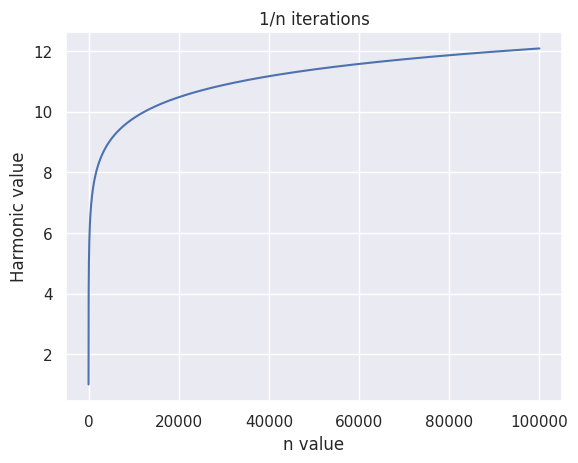

In [57]:
plot_convergence(100000)